In [17]:
# Late Delivery Area Prediction from Olist Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import zipfile
import os
import glob

In [18]:

with zipfile.ZipFile(r'C:\Users\deepi\Downloads\archive (3).zip', 'r') as zip_ref:
    zip_ref.extractall(r'C:\Users\deepi\Downloads\olist_data')


In [19]:
import zipfile
import os

# Correct the zip path (don't include 'r' mode here)
zip_path = r'C:\Users\deepi\Downloads\archive (3).zip'
extract_path = r'C:\Users\deepi\Downloads\olist_data'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [20]:
# Read all CSVs into dictionary
file_dict = {f.split('.')[0]: pd.read_csv(os.path.join(extract_path, f)) 
             for f in os.listdir(extract_path) if f.endswith('.csv')}

# Assign readable names
orders = file_dict['olist_orders_dataset']
customers = file_dict['olist_customers_dataset']
items = file_dict['olist_order_items_dataset']
products = file_dict['olist_products_dataset']
sellers = file_dict['olist_sellers_dataset']
geolocation = file_dict['olist_geolocation_dataset']
payments = file_dict['olist_order_payments_dataset']
reviews = file_dict['olist_order_reviews_dataset']


In [21]:
pd.read_csv(r'C:\Users\deepi\Downloads\olist_data\olist_order_items_dataset.csv')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [22]:
import os
file_path = os.path.join(r'C:\Users\deepi\Downloads\olist_data', 'olist_order_items_dataset.csv')
order_items = pd.read_csv(file_path)


In [23]:
order_items = pd.read_csv(file_path)  # your corrected path


In [24]:
# Pick first product per order
order_items_reduced = order_items.groupby('order_id').first().reset_index()

# Merge with main orders
orders = orders.merge(order_items_reduced[['order_id', 'product_id']], on='order_id', how='left')


In [25]:
# 2. Parse datetime columns
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [26]:
# 3. Merge relevant datasets
orders = orders.merge(customers, on='customer_id', how='left')
orders = orders.merge(items[['order_id', 'seller_id']], on='order_id', how='left')
orders = orders.merge(sellers[['seller_id', 'seller_city']], on='seller_id', how='left')

In [27]:
orders = orders.merge(deliveries, on="order_id", how="left")


NameError: name 'deliveries' is not defined

In [28]:
# Drop rows with missing delivery dates
orders = orders.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'])


In [29]:
# Drop rows with missing delivery dates
orders = orders.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'])


In [30]:
# 4. Feature engineering
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])


In [31]:
# Create late_delivery label
orders['late_delivery'] = (orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date']).astype(int)


In [40]:
# Drop rows without delivery info
orders = orders.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'])

In [39]:
print(orders.columns)


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'seller_id', 'seller_city',
       'late_delivery'],
      dtype='object')


In [41]:
orders['city_encoded'] = label_enc.fit_transform(orders['customer_city'])  # or _y if preferred


In [42]:
# Encode cities (area proxy)
label_enc = LabelEncoder()
orders['city_encoded'] = label_enc.fit_transform(orders['customer_city'])

In [43]:
# Select features
features = ['city_encoded', 'product_id']
orders = orders.dropna(subset=features)
X = orders[features]
y = orders['late_delivery']

In [44]:
# Encode product_id (optional)
X['product_id'] = LabelEncoder().fit_transform(X['product_id'])


C:\Users\deepi\AppData\Local\Temp\ipykernel_4980\2776987339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['product_id'] = LabelEncoder().fit_transform(X['product_id'])


In [45]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [46]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [47]:
# Evaluate
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     20297
           1       0.31      0.24      0.27      1743

    accuracy                           0.90     22040
   macro avg       0.62      0.60      0.61     22040
weighted avg       0.89      0.90      0.89     22040

Confusion Matrix:
 [[19344   953]
 [ 1323   420]]


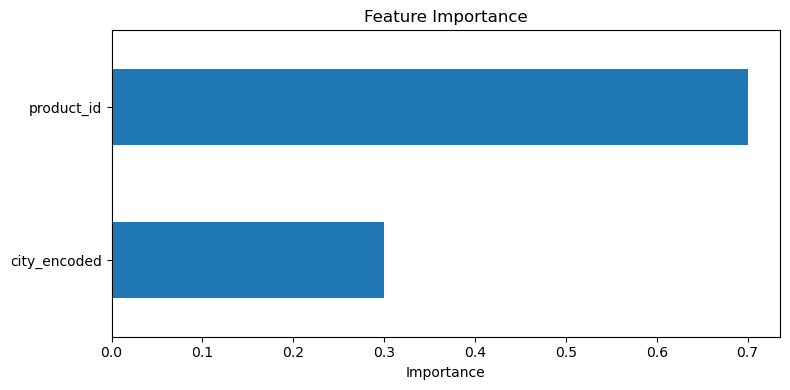

In [48]:
# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance', figsize=(8, 4))
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

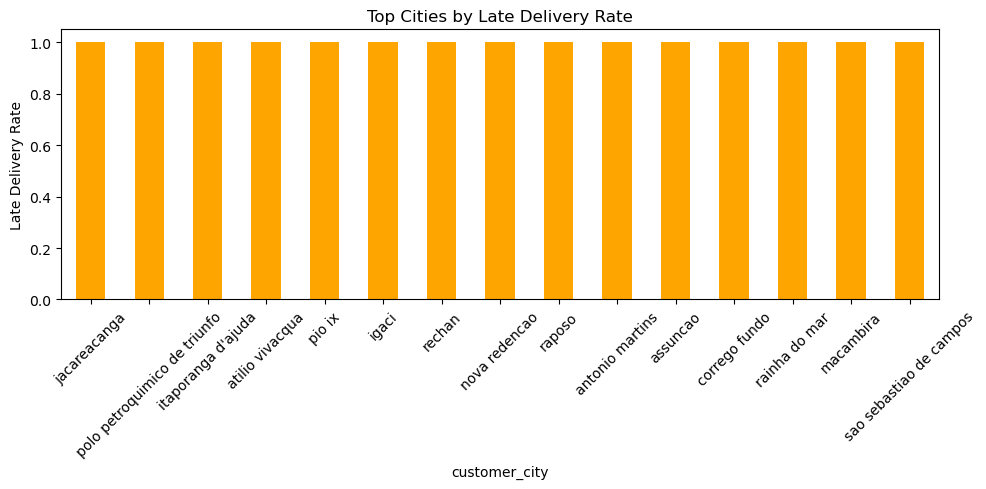

In [49]:
# Analyze late delivery by area
area_late_stats = orders.groupby('customer_city')['late_delivery'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
area_late_stats.head(15).plot(kind='bar', color='orange')
plt.title("Top Cities by Late Delivery Rate")
plt.ylabel("Late Delivery Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
# Reset index if needed
area_late_stats = orders.groupby('customer_city')['late_delivery'].mean().sort_values(ascending=False)
area_late_stats = area_late_stats.reset_index()

# Check structure
print(area_late_stats.head())  # Optional debug

# Rename properly (should be only 2 columns now)
area_late_stats.columns = ['City', 'Late Delivery Rate']

# Save to CSV
area_late_stats.to_csv('C:/Users/deepi/Downloads/olist_data/late_delivery_by_city.csv', index=False)

print("\nSaved top late delivery cities to CSV.")


                  customer_city  late_delivery
0                  jacareacanga            1.0
1  polo petroquimico de triunfo            1.0
2            itaporanga d'ajuda            1.0
3               atilio vivacqua            1.0
4                        pio ix            1.0

Saved top late delivery cities to CSV.


In [52]:
late_counts = orders[orders['late_delivery'] == 1].groupby('customer_city')['late_delivery'].count()
late_counts = late_counts.reset_index()
late_counts.columns = ['City', 'Late Delivery Count']


In [53]:
late_counts_filtered = late_counts[late_counts['Late Delivery Count'] > 1]


In [54]:
late_counts_filtered = late_counts_filtered.sort_values(by='Late Delivery Count', ascending=False)
print(late_counts_filtered.head(10))


                City  Late Delivery Count
1126       sao paulo                 1082
980   rio de janeiro                  860
1007        salvador                  232
129   belo horizonte                  194
920     porto alegre                  180
159         brasilia                  175
205         campinas                  160
402        fortaleza                  126
759          niteroi                  109
1079     sao goncalo                  105


In [55]:
# Step 1: Filter failed deliveries
failed_orders = orders[orders['order_status'].isin(['canceled', 'unavailable'])]

# Step 2: Group by city and count
failed_by_city = failed_orders.groupby('customer_city')['order_id'].count().reset_index()
failed_by_city.columns = ['City', 'Failed Delivery Count']

# Step 3: Filter cities with more than 1 failed delivery
failed_by_city_filtered = failed_by_city[failed_by_city['Failed Delivery Count'] > 1]

# Step 4: Sort descending
failed_by_city_filtered = failed_by_city_filtered.sort_values(by='Failed Delivery Count', ascending=False)

# Step 5: Show top 10
print(failed_by_city_filtered.head(10))

# Optional: Save to CSV
failed_by_city_filtered.to_csv('C:/Users/deepi/Downloads/olist_data/failed_deliveries_by_city.csv', index=False)


             City  Failed Delivery Count
2  rio de janeiro                      3
3       sao paulo                      2


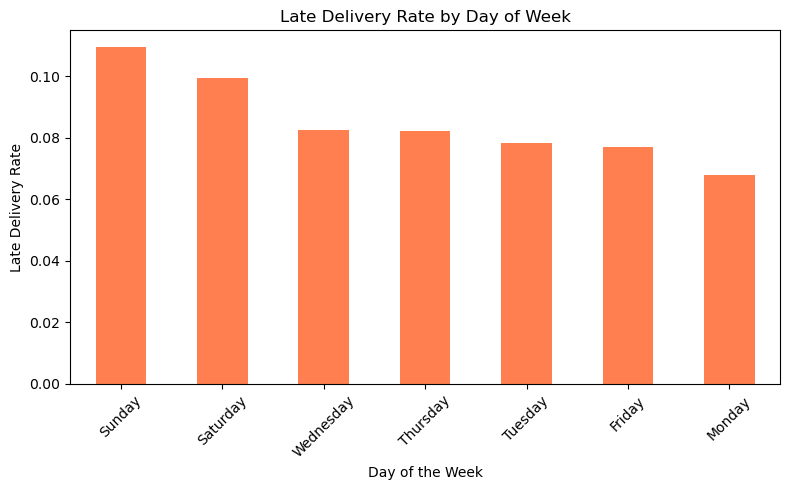

In [56]:
# Extract day of week from purchase/delivery date
orders['delivery_day'] = orders['order_delivered_customer_date'].dt.day_name()

# Group by delivery day and calculate late delivery rate
late_by_day = orders.groupby('delivery_day')['late_delivery'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
late_by_day.plot(kind='bar', color='coral')
plt.title("Late Delivery Rate by Day of Week")
plt.ylabel("Late Delivery Rate")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [58]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2%}")


Model Accuracy: 89.67%



Model Accuracy: 91.82%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     20254
           1       0.48      0.13      0.21      1786

    accuracy                           0.92     22040
   macro avg       0.71      0.56      0.58     22040
weighted avg       0.89      0.92      0.90     22040



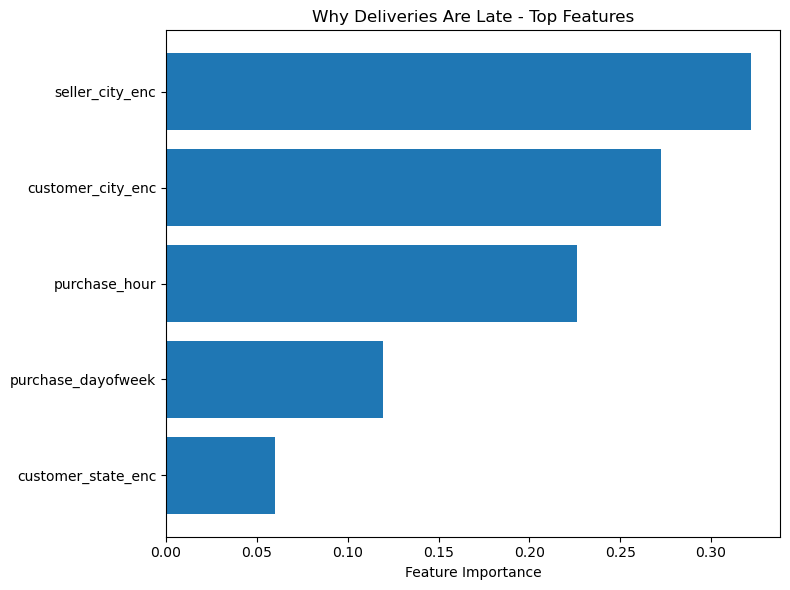

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Preprocessing
orders = orders.dropna(subset=['customer_city', 'customer_state', 'seller_city', 'order_purchase_timestamp', 'late_delivery'])

# Encode categorical features
le_city = LabelEncoder()
orders['customer_city_enc'] = le_city.fit_transform(orders['customer_city'])
orders['customer_state_enc'] = LabelEncoder().fit_transform(orders['customer_state'])
orders['seller_city_enc'] = LabelEncoder().fit_transform(orders['seller_city'])

# Convert timestamp to datetime and extract features
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['purchase_dayofweek'] = orders['order_purchase_timestamp'].dt.dayofweek
orders['purchase_hour'] = orders['order_purchase_timestamp'].dt.hour

# 2. Feature Selection
features = ['customer_city_enc', 'customer_state_enc', 'seller_city_enc', 'purchase_dayofweek', 'purchase_hour']
X = orders[features]
y = orders['late_delivery']

# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 5. Predict & Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {acc:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 6. Feature Importance Plot
importances = model.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Why Deliveries Are Late - Top Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [63]:
print(orders.groupby('seller_city')['late_delivery'].mean().sort_values(ascending=False).head(10))


seller_city
portoferreira             1.000000
sao paulo sp              1.000000
soledade                  1.000000
ivoti                     1.000000
joao pinheiro             0.666667
manaus                    0.666667
ferraz de  vasconcelos    0.500000
gaspar                    0.500000
fernando prestes          0.333333
feira de santana          0.333333
Name: late_delivery, dtype: float64
